## **1. Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

from ipywidgets import interact

## **2. Load Dataset**

In [2]:
df = pd.read_csv("drive/MyDrive/Dataset/IMDB_Dataset.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### **3. Basic EDA**

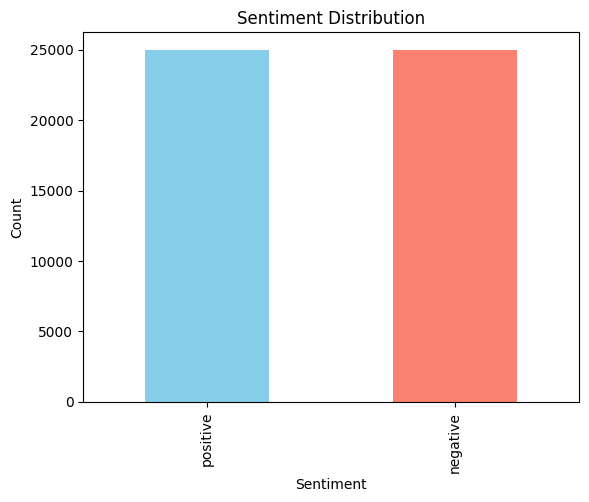

In [3]:
df["sentiment"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### **4. Text Preprocessing**

In [4]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)                # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)            # keep only letters
    text = text.lower()                               # lowercase
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

df["clean_review"] = df["review"].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


### **5. Label Encoding**

In [5]:
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
X = df["clean_review"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 40000
Test size: 10000


### **6. TF-IDF Vectorization**

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### **7. Define Models**

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": LinearSVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

### **8. Model Evaluation Function**

In [8]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return acc, prec, rec, f1

### **9. Train & Evaluate All Models**


Classification Report - Logistic Regression
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      4961
    Positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



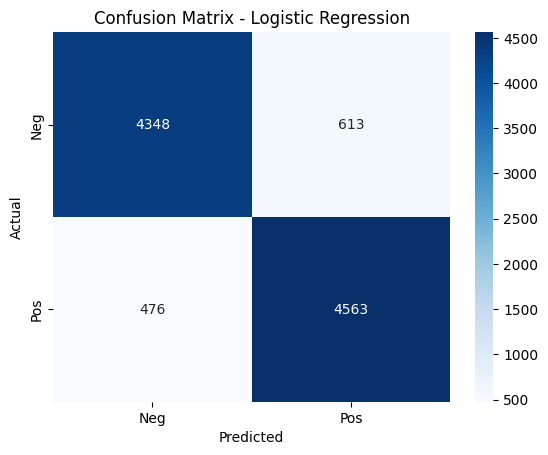


Classification Report - Naive Bayes
              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      4961
    Positive       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



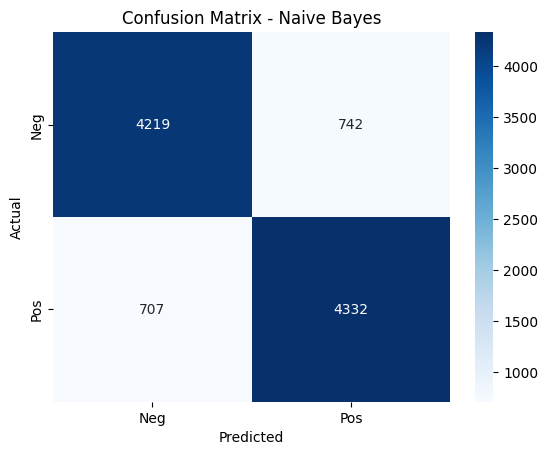


Classification Report - Random Forest
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      4961
    Positive       0.86      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



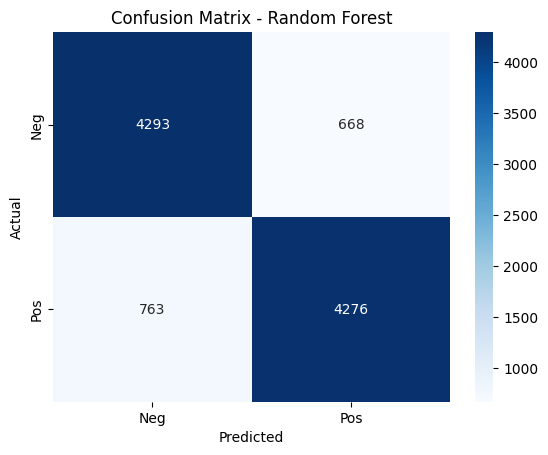


Classification Report - SVM
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4961
    Positive       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



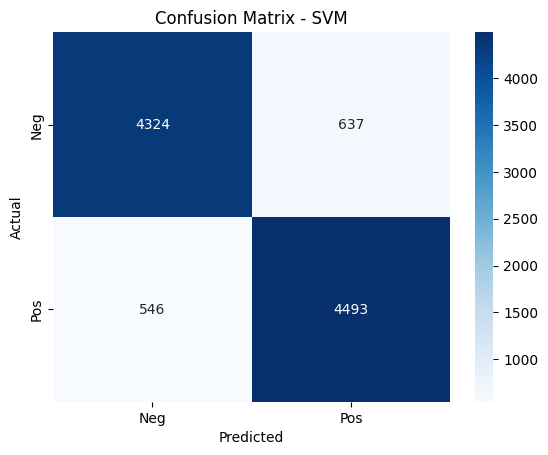

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:34:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report - XGBoost
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85      4961
    Positive       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



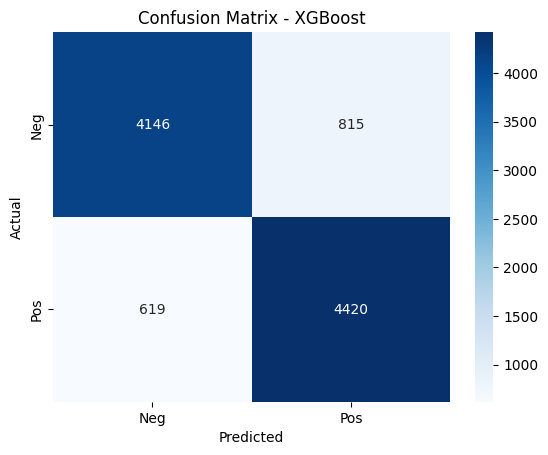

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.8911,0.881569,0.905537,0.893392
3,SVM,0.8817,0.875828,0.891645,0.883666
4,XGBoost,0.8566,0.844317,0.877158,0.860424
1,Naive Bayes,0.8551,0.853764,0.859694,0.856719
2,Random Forest,0.8569,0.864887,0.848581,0.856656


In [9]:
results = []

for name, clf in models.items():
    acc, prec, rec, f1 = evaluate_model(clf, X_train_vec, y_train, X_test_vec, y_test, name)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
results_df

### **10. Visualization of Metrics**

In [11]:
# Line plot for all models
def plot_all(show_accuracy=True, show_precision=True, show_recall=True, show_f1=True):
    plt.figure(figsize=(10,6))

    if show_accuracy:
        plt.plot(results_df["Model"], results_df["Accuracy"], marker="o", label="Accuracy")
    if show_precision:
        plt.plot(results_df["Model"], results_df["Precision"], marker="o", label="Precision")
    if show_recall:
        plt.plot(results_df["Model"], results_df["Recall"], marker="o", label="Recall")
    if show_f1:
        plt.plot(results_df["Model"], results_df["F1"], marker="o", label="F1")

    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

interact(plot_all, show_accuracy=True, show_precision=True, show_recall=True, show_f1=True);

interactive(children=(Checkbox(value=True, description='show_accuracy'), Checkbox(value=True, description='sho…

### **11. Individual Model Metrics**

In [12]:
def plot_single(model_name, show_accuracy=True, show_precision=True, show_recall=True, show_f1=True):
    plt.figure(figsize=(8,5))
    model_data = results_df[results_df["Model"] == model_name].iloc[0]

    metrics, values = [], []
    if show_accuracy: metrics.append("Accuracy"); values.append(model_data["Accuracy"])
    if show_precision: metrics.append("Precision"); values.append(model_data["Precision"])
    if show_recall: metrics.append("Recall"); values.append(model_data["Recall"])
    if show_f1: metrics.append("F1"); values.append(model_data["F1"])

    plt.plot(metrics, values, marker="o", label=model_name)
    plt.title(f"Performance Metrics - {model_name}")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

interact(
    plot_single,
    model_name=list(results_df["Model"]),
    show_accuracy=True,
    show_precision=True,
    show_recall=True,
    show_f1=True
);

interactive(children=(Dropdown(description='model_name', options=('Logistic Regression', 'SVM', 'XGBoost', 'Na…

### **12. Save the Best Model**

In [13]:
import joblib

# Find the best model based on F1
best_model_name = results_df.sort_values(by="F1", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

# Retrain on full training data
best_model.fit(X_train_vec, y_train)

# Save the vectorizer and model
joblib.dump(best_model, "best_sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print(f"Best model saved: {best_model_name}")

Best model saved: Logistic Regression
